In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Daily Household Transactions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [45]:
# One-hot encode the 'Category' column
encoded_df = pd.get_dummies(df['Category'])

# Add the 'Amount' column to the encoded dataset
encoded_df['Amount'] = df['Amount']

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract correlations of categories with the 'Amount'
category_amount_correlation = correlation_matrix['Amount'].drop('Amount').sort_values(ascending=False)


# Display the top correlations
category_amount_correlation


,Amount
Salary,0.596680
Fixed Deposit,0.506375
Maturity amount,0.221593
Equity Mutual Fund B,0.156644
Share Market,0.144943
Money transfer,0.120965
Saving Bank account 1,0.089374
Public Provident Fund,0.079784
Tourism,0.035941
Life Insurance,0.035528


In Pandas, the get_dummies() function converts categorical variables into dummy/indicator variables (known as one-hot encoding). This method is especially useful when preparing data for machine learning algorithms that require numeric input

In [27]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)
# Calculate correlation matrix
correlation_matrix1 = pivot_table.corr()

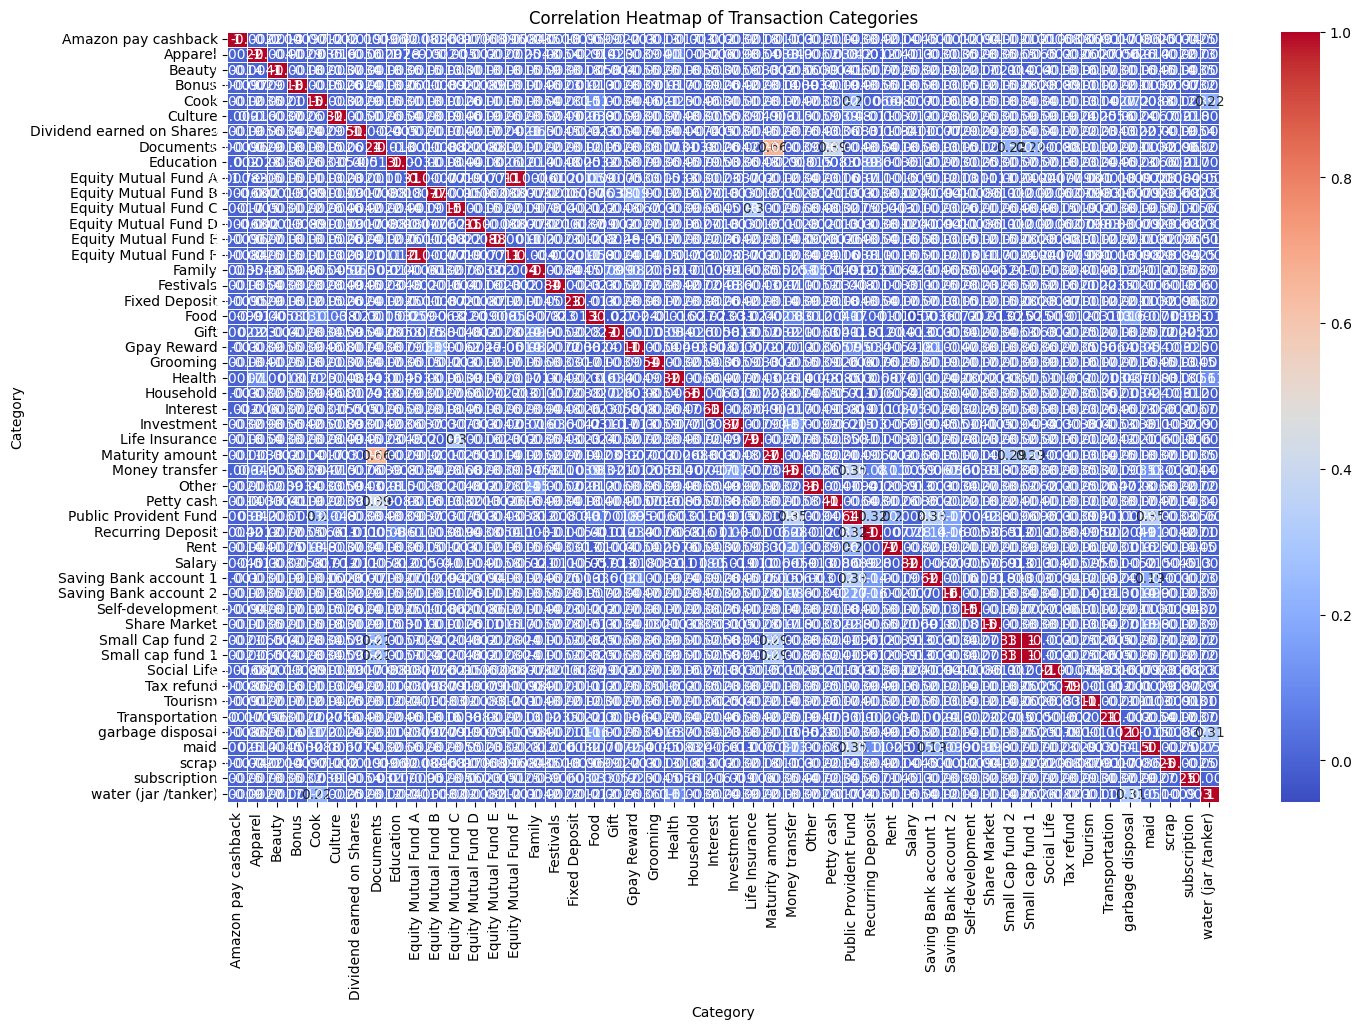

In [34]:
# Calculate correlation matrix
correlation_matrix1 = pivot_table.corr()
# Plot correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()


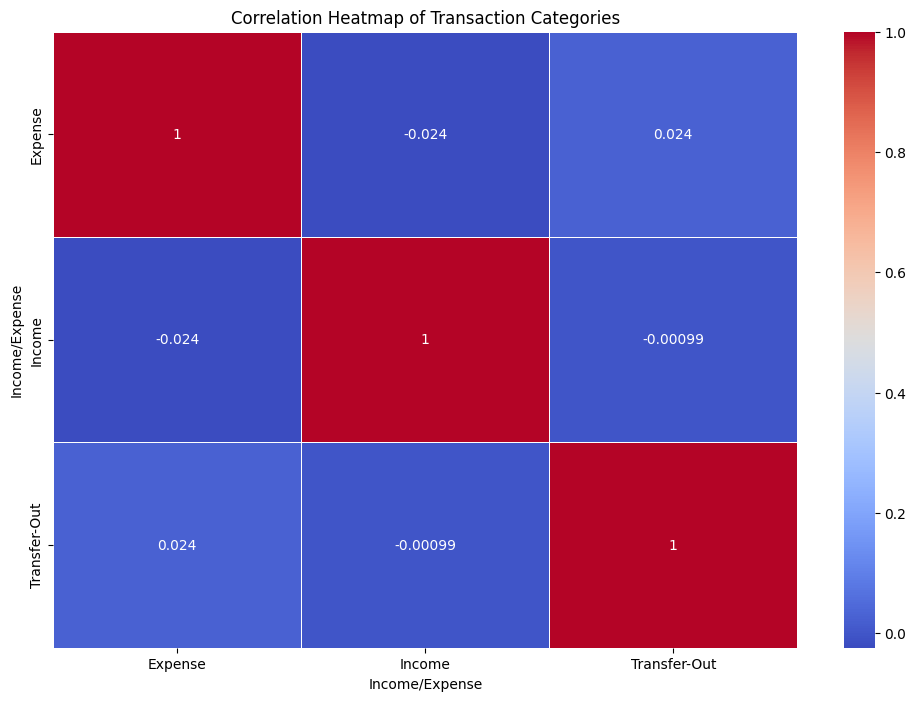

In [25]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()


In [23]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Income/Expense', values='Amount',
aggfunc='sum', fill_value=0)
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

In [24]:
correlation_matrix

Income/Expense,Expense,Income,Transfer-Out
Income/Expense,,,
Expense,1.000000,-0.023841,0.024425
Income,-0.023841,1.000000,-0.000990
Transfer-Out,0.024425,-0.000990,1.000000
